# Import the dataset

In [ ]:
# Install all the necessary libraries
!pip install numpy pandas matplotlib seaborn tabulate keras

In [ ]:
# Import all the necessary libraries

# Basic mathematical libs
import numpy as np
import pandas as pd
from scipy import stats

# Basic plotting libs
import matplotlib.pyplot as plt
import seaborn as sb

# Basic machine learning libs
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, recall_score, classification_report, auc, roc_curve, precision_recall_fscore_support, f1_score, accuracy_score

# Basic deep learning libs
from keras import layers
from keras.layers import Input, Dense, Lambda
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard
import keras.backend as K
import keras
import tensorflow as tf

# Table plotting enhancement libs
from tabulate import tabulate

# Basic libs to import libs from drive
from google.colab import drive
drive.mount('/content/drive')

# Filter all the unwanted warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
# Import the card-transactions dataset and observe few samples
df = pd.read_csv(
        filepath_or_buffer='/content/drive/My Drive/datasets/creditcard.csv',
        sep=',',
        header='infer',
        skiprows=0)

print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤═══════════╤════════════╤═════════╤═══════════╤════════════╤════════════╤═══════════╤════════════╤═══════════╤════════════╤═══════════╤════════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤════════════╤═══════════╤════════════╤════════════╤════════════╤═══════════╤════════════╤═══════════╤═══════════╤════════════╤════════════╤══════════╤═════════╕
│    │   Time │        V1 │         V2 │      V3 │        V4 │         V5 │         V6 │        V7 │         V8 │        V9 │        V10 │       V11 │        V12 │       V13 │       V14 │       V15 │       V16 │       V17 │        V18 │       V19 │        V20 │        V21 │        V22 │       V23 │        V24 │       V25 │       V26 │        V27 │        V28 │   Amount │   Class │
╞════╪════════╪═══════════╪════════════╪═════════╪═══════════╪════════════╪════════════╪═══════════╪════════════╪═══════════╪════════════╪═══════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═════════

# Get statistical measures of dataset

In [ ]:
# Getting the insights of the data for further processing

# To get the size of the data
print('There are %d datapoints and %d features for the data' % df.shape)
print('\n', '-'*100, '\n')

# To get the total count of types of transactions
print('Count of non-fraud: ', pd.value_counts(df['Class'])[0])
print('Count of fraud: ', pd.value_counts(df['Class'])[1])
print('\n', '-'*100, '\n')

# To get type summary of the numerical columns in df
print('Type Information values')
print(df.info())
print('\n', '-'*100, '\n')

# To get statistical summary of the numerical columns in df
print('Standard statistical values')
print(df.describe())
print('\n', '-'*100, '\n')

# To get the total count of nan values in each column
print('Count of nan values')
print(df.isna().sum())
print('\n', '-'*100, '\n')

# To get the total count of duplicate values in each column
print('Count of duplicate rows')
print(df.duplicated().sum())
print('\n', '-'*100, '\n')

There are 284807 datapoints and 31 features for the data

 ---------------------------------------------------------------------------------------------------- 

Count of non-fraud:  284315
Count of fraud:  492

 ---------------------------------------------------------------------------------------------------- 

Type Information values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     2848

# Perform Preprocessing of dataset

In [ ]:
# Perform some operations on dataset to get it ready to implement model

def preprocess_data_credit_card(df):

    # Handle the duplicate rows
    df = df.drop_duplicates() # drop duplicate rows
    df.reset_index(drop=True, inplace=True) # reset the index
    return df

preprocessing_pipeline = Pipeline([
    ('cleaning', FunctionTransformer(preprocess_data_credit_card, validate=False)),
], verbose=True)

df = preprocessing_pipeline.fit_transform(df)

[Pipeline] .......... (step 1 of 1) Processing cleaning, total=   4.8s


# Perform Exploratory Dataset Analysis

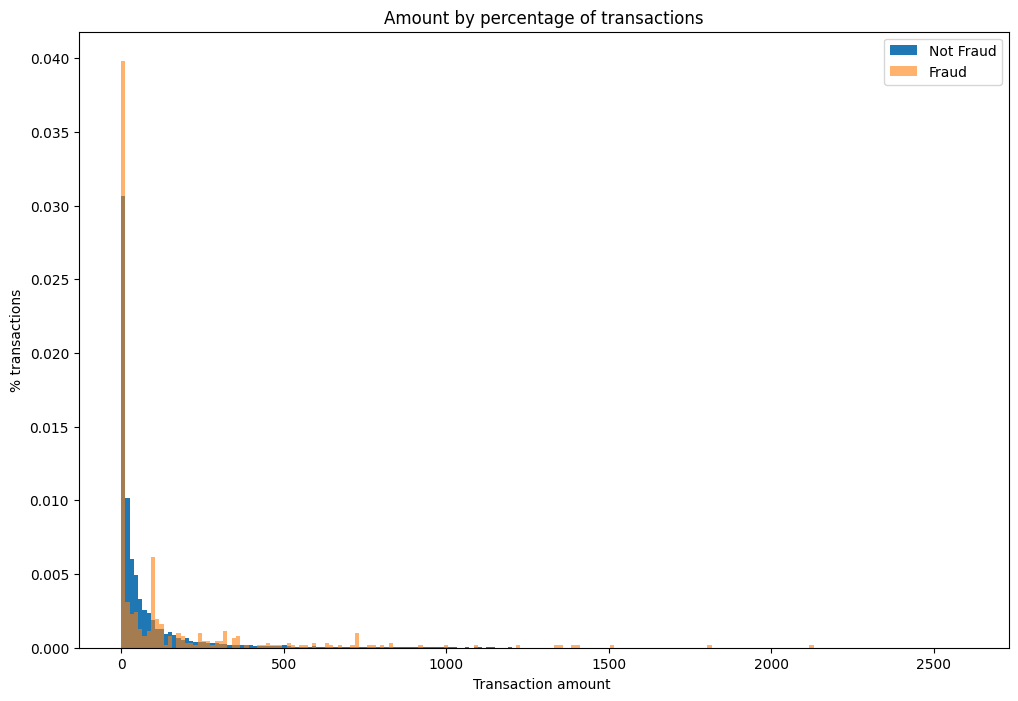

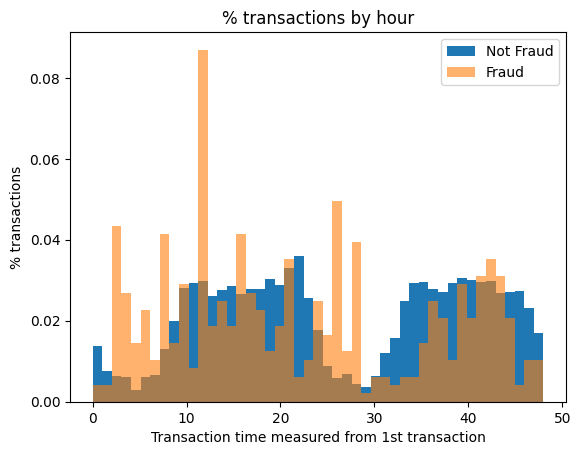

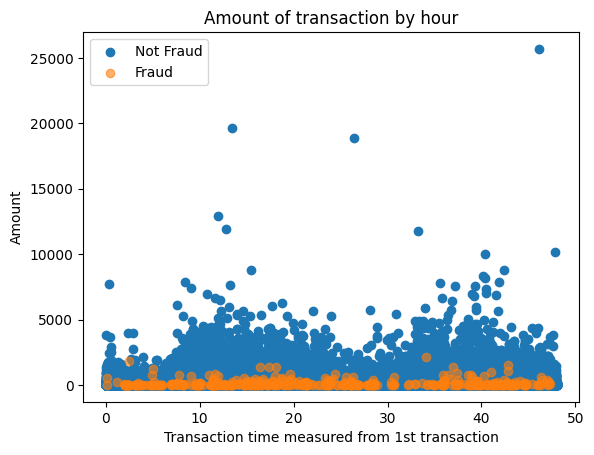

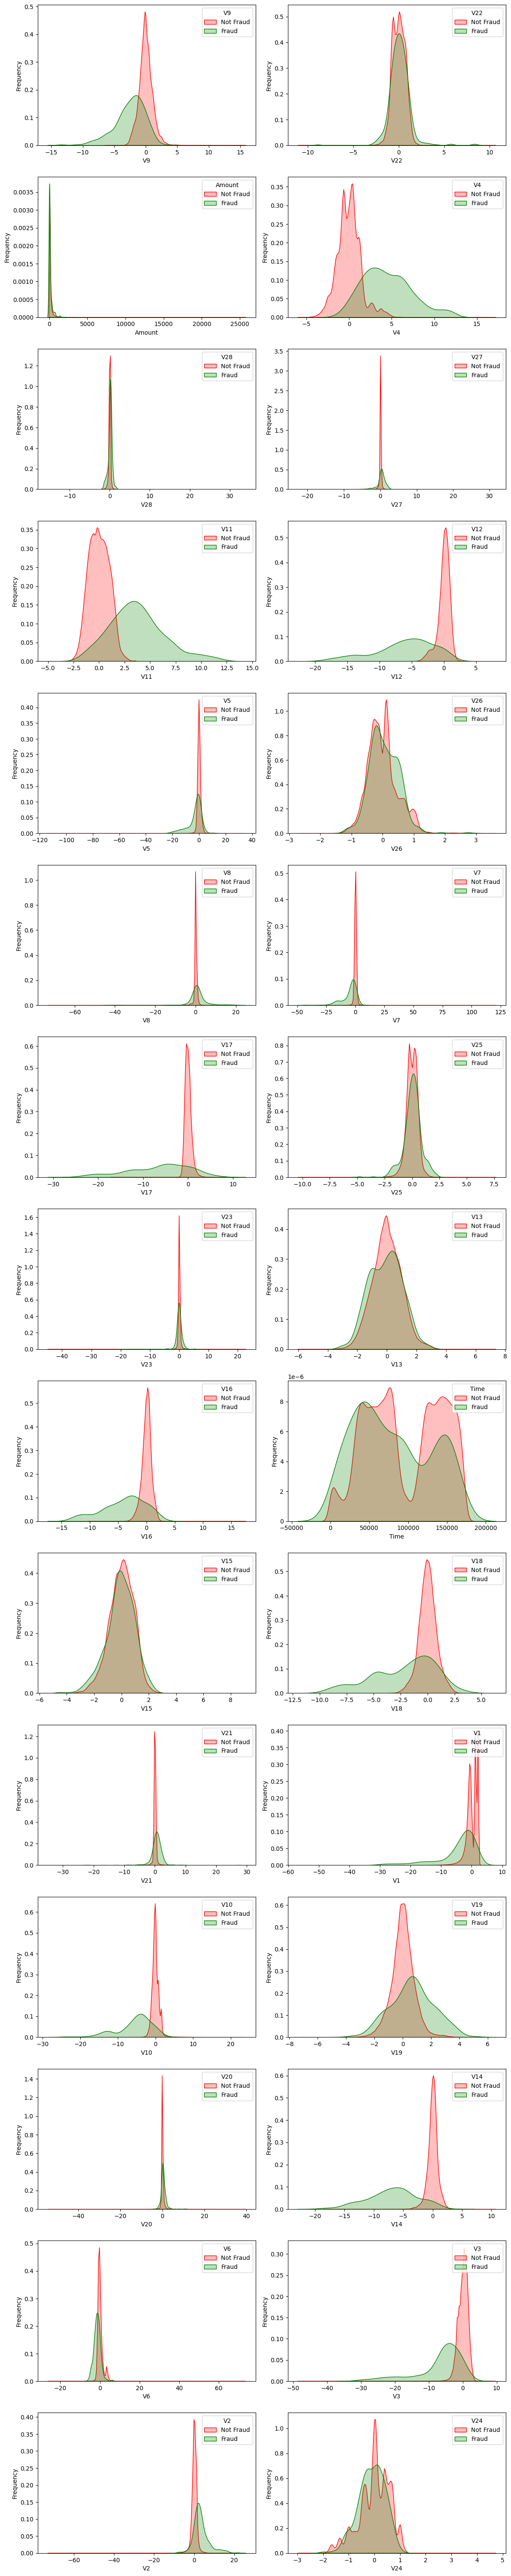

In [ ]:
# Observing the non-fraud / fraud transactions
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

# Set the figure size by default
plt.figure(figsize=(12, 8))

# Plot of high value transactions
bins = np.linspace(0, 2600, 200)
plt.hist(non_fraud_df['Amount'], bins, alpha=1, density=True, label='Non Fraud')
plt.hist(fraud_df['Amount'], bins, alpha=0.6, density=True, label='Fraud')
plt.legend(['Not Fraud', 'Fraud'])
plt.title('Amount by percentage of transactions')
plt.xlabel('Transaction amount ')
plt.ylabel('% transactions')
plt.show()

# Plot the Data by Hour
bins = np.linspace(0, 48, 48) # 48 hours
plt.hist((non_fraud_df['Time']/(60*60)), bins, alpha=1, density=True, label='Non Fraud')
plt.hist((fraud_df['Time']/(60*60)), bins, alpha=0.6, density=True, label='Fraud')
plt.legend(['Not Fraud', 'Fraud'])
plt.title('% transactions by hour')
plt.xlabel('Transaction time measured from 1st transaction')
plt.ylabel('% transactions')
plt.show()

# Plot the Transaction Amount vs. Hour
plt.scatter((non_fraud_df['Time']/(60*60)), non_fraud_df['Amount'], alpha=1, label='Non Fraud')
plt.scatter((fraud_df['Time']/(60*60)), fraud_df['Amount'], alpha=0.6, label='Fraud')
plt.title('Amount of transaction by hour')
plt.xlabel('Transaction time measured from 1st transaction')
plt.ylabel('Amount')
plt.legend(['Not Fraud', 'Fraud'])
plt.show()


# Observe the Density plots for all features
cat_cols = set(df.drop(['Class'], axis=1).columns)
num_cols = 2
num_rows = (len(cat_cols) + 1) // 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
if len(cat_cols) > 1:
    axes = axes.flatten()
for i, col in enumerate(cat_cols):
    ax = axes[i]
    ax = sb.kdeplot(data=non_fraud_df[col], ax=ax, color='red', shade=True)
    ax = sb.kdeplot(data=fraud_df[col], ax=ax, color='green', shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(['Not Fraud', 'Fraud'])
    ax.set_title(col)

for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

# Generate training and testing dataset

In [ ]:
# Split the data as fraud vs non-fraud
non_fraud_df, fraud_df = df[df['Class']==0], df[df['Class']==1]

# To get the sizes of data
print('There are %d datapoints and %d features for the non-fraud data' % non_fraud_df.shape)
print('There are %d datapoints and %d features for the fraud data' % fraud_df.shape)
print('\n', '-'*100, '\n')

# % printing of data
print('% samples are non-fraud ', (non_fraud_df.shape[0]/df.shape[0]) *100)
print('% samples are fraud ', (fraud_df.shape[0]/df.shape[0]))
print('\n', '-'*100, '\n')

# Spliting the data for train
X_train = non_fraud_df.drop(columns=['Class'], axis=1).sample(frac=0.66, random_state=42) # 2/3 of all samples
y_train = non_fraud_df['Class']

# Get the indices of rows that are not in X_train
remaining_indices = non_fraud_df.index.difference(X_train.index)

# Random sampling of the transactions for fraud and non-fraud
non_fraud_df_sample = non_fraud_df.loc[remaining_indices] # 1/3 of all samples
fraud_df_sample = fraud_df
print('There are %d datapoints and %d features for the non-fraud data samples' % non_fraud_df_sample.shape)
print('There are %d datapoints and %d features for the fraud data samples' % fraud_df_sample.shape)
print('\n', '-'*100, '\n')

# To mix both dfs
combined_df = pd.concat([non_fraud_df_sample, fraud_df_sample], ignore_index=True)
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
print('% samples are non-fraud ', (non_fraud_df_sample.shape[0]/combined_df.shape[0]) *100)
print('% samples are fraud ', (fraud_df_sample.shape[0]/combined_df.shape[0]) *100)
print('\n', '-'*100, '\n')

# Spliting the data for test
X_test  = combined_df.drop(columns=['Class'], axis=1)
y_test  = combined_df['Class']

non_fraud_df = X_train

# Standardized the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


There are 283253 datapoints and 31 features for the non-fraud data
There are 473 datapoints and 31 features for the fraud data

 ---------------------------------------------------------------------------------------------------- 

% samples are non-fraud  99.83328986416473
% samples are fraud  0.001667101358352777

 ---------------------------------------------------------------------------------------------------- 

There are 96306 datapoints and 31 features for the non-fraud data samples
There are 473 datapoints and 31 features for the fraud data samples

 ---------------------------------------------------------------------------------------------------- 

% samples are non-fraud  99.51125760753882
% samples are fraud  0.4887423924611744

 ---------------------------------------------------------------------------------------------------- 



# Normal Autoencoder

Normal Autoencoder Layer Structure
Autoencoder has symmetric encoding and decoding layers which are Dense in nature.
We are trying to reduce the input into some form of simplified encoding and then expanding it again.
The input and output dimension is the feature space of 30 dims, so the encoding layer should be smaller by an amount that expect to represent some feature.
In this case, We tried to encode 30 feature columns into 18 dims so we are expecting high-level features to be represented by roughly 2 columns
Of those high-level features, We are expecting them to map to roughly 6 latent features/dims in the data.


In [ ]:
# Normal Autoencoder

# Define the input layer
input_layer = Input(shape=(X_train.shape[1], ))

# Construct encoder network
encoder = Dense(18, activation=layers.LeakyReLU(alpha=0.01), activity_regularizer=regularizers.l1(1e-7))(input_layer)
encoder = Dense(10, activation="elu")(encoder)
encoder = Dense(6, activation="tanh")(encoder)

# Decoder network
decoder = Dense(10, activation='elu')(encoder)
decoder = Dense(18, activation=layers.LeakyReLU(alpha=0.01))(decoder)
decoder = Dense(X_train.shape[1], activation='relu')(decoder)

# Create the autoencoder
autoencoder_normal_model = Model(inputs=input_layer, outputs=decoder, name='ae')

# Compile the model and Define loss functions
autoencoder_normal_model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

# Print the actual layers of model
print(autoencoder_normal_model.summary())

# Saving the model temporarily
cp_normal = ModelCheckpoint(filepath="normal_autoencoder.h5", save_best_only=True, verbose=0)

# To visualize dynamic graphs
tb_normal = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

# Train the model
history_normal = autoencoder_normal_model.fit(X_train, X_train, epochs=50, batch_size=64, shuffle=True, validation_split=0.1, verbose='1', callbacks=[cp_normal, tb_normal]).history

# Load the trained model
normal_autoencoder = load_model('normal_autoencoder.h5')


Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 18)                558       
                                                                 
 dense_1 (Dense)             (None, 10)                190       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 10)                70        
                                                                 
 dense_4 (Dense)             (None, 18)                198       
                                                                 
 dense_5 (Dense)             (None, 30)                570      

# Variational Autoencoder

Variational Autoencoder Layer Structure
Autoencoder has symmetric encoding and decoding layers which are Dense in nature.
We are trying to reduce the input into some form of simplified encoding and then expanding it again.
The input and output dimension is the feature space of 30 dims, so the encoding layer should be smaller by an amount that expect to represent some feature.
In this case, We tried to encode 30 feature columns into 18 dims so we are expecting high-level features to be represented by roughly 2 columns
Of those high-level features, We are expecting them to map to roughly 6 latent features/dims/mapping-distributions in the data.


In [ ]:
# Variational Autoencoder

# Define the input layer
input_layer = Input(shape = (X_train.shape[1], ))

# Construct encoder network
encoded = Dense(18, activation=layers.LeakyReLU(alpha=0.01), activity_regularizer=regularizers.l1(1e-7))(input_layer)
encoded = Dense(10, activation='elu', activity_regularizer=regularizers.l1(1e-7))(encoded)

# Define the mean and log-variance layers
latent_dims=6
z_mean = Dense(latent_dims)(encoded)
z_log_var = Dense(latent_dims)(encoded)
epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dims), mean=0., stddev=1.)
z = z_mean + K.exp(0.5 * z_log_var) * epsilon

encoder = Model(input_layer, outputs = [z_mean, z_log_var, z], name = 'encoder')


# Decoder network
decoder_input = Input(shape=(latent_dims,))
decoded = decoder_input

decoded = Dense(10, activation='elu')(decoded)
decoded = Dense(18, activation=layers.LeakyReLU(alpha=0.01))(decoded)
decoded = Dense(X_train.shape[1], activation='relu')(decoded)
decoder = Model(decoder_input, decoded, name='decoder')

# Define the reconstruction loss as mean_squared_error
def reconstruction_loss_mse(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

# Define the KL divergence
def kl_loss_variational(mu, log_var):
    loss = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mu) - tf.exp(log_var))
    return loss

# Create the variational autoencoder
z_mean, z_log_var, z = encoder(input_layer)
reconstructed=decoder(z)
autoencoder_variational_model = Model(input_layer, reconstructed, name='vae')

# Define loss functions
reconstruction_loss_mse_get = reconstruction_loss_mse(input_layer, reconstructed)
kl_loss_get=kl_loss_variational(z_mean, z_log_var)
vae_loss_get = K.mean(reconstruction_loss_mse_get + kl_loss_get)
autoencoder_variational_model.add_loss(vae_loss_get)

# Compile the model
autoencoder_variational_model.compile(optimizer='adam')

# Print the actual layers of model
print(autoencoder_variational_model.summary())

# Saving the model temporarily
cp_variational = ModelCheckpoint(filepath="variational_autoencoder.h5",save_best_only=True,verbose=0)

# To visualize dynamic graphs
tb_variational = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

# Train the model
history_variational = autoencoder_variational_model.fit(X_train, X_train, batch_size=64, epochs=50, shuffle=True, validation_split=0.10, verbose='1', callbacks=[cp_variational, tb_variational]).history

# Load the trained model
variational_autoencoder = load_model('variational_autoencoder.h5')


Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 encoder (Functional)        [(None, 6),                  880       ['input_2[0][0]']             
                              (None, 6),                                                          
                              (None, 6)]                                                          
                                                                                                  
 decoder (Functional)        (None, 30)                   838       ['encoder[0][2]']             
                                                                                                

# Observing trained models

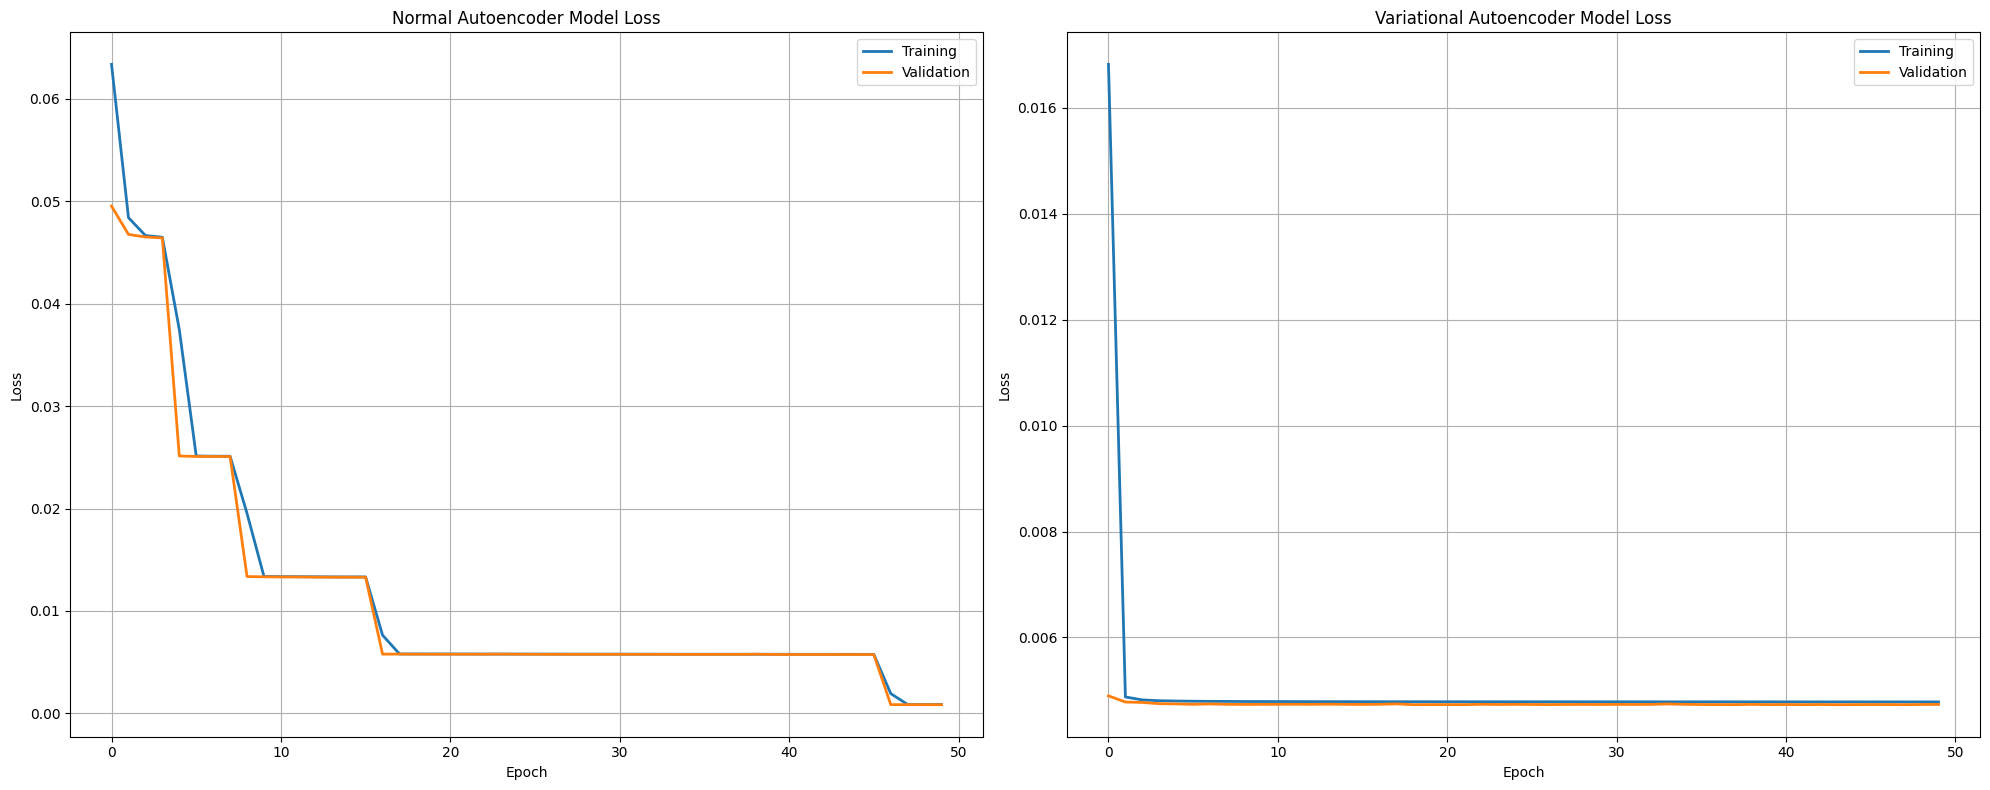

In [ ]:
plt.figure(figsize=(20, 8))

# Plot for Normal Autoencoder
plt.subplot(1, 2, 1)
plt.plot(history_normal['loss'], linewidth=2, label='Training')
plt.plot(history_normal['val_loss'], linewidth=2, label='Validation')
plt.legend(loc='upper right')
plt.title('Normal Autoencoder Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)

# Plot for Variational Autoencoder
plt.subplot(1, 2, 2)
plt.plot(history_variational['loss'], linewidth=2, label='Training')
plt.plot(history_variational['val_loss'], linewidth=2, label='Validation')
plt.legend(loc='upper right')
plt.title('Variational Autoencoder Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Sample the Non-fraud Data
indices_non_fraud_test = y_test==0
n_fraud=X_test[indices_non_fraud_test]

# Sample the Non-fraud Data
indices_fraud_test = y_test==1
fraud=X_test[indices_fraud_test]



# Evaluate the Normal Autoencoder model
print('Reconstruction Errors for the Normal Autoencoder')
reconstructed_data = normal_autoencoder.predict(X_test)
mse_total_per_sample_normal = np.mean(np.square(X_test - reconstructed_data), axis=1)
mse_total_normal = np.mean(mse_total_per_sample_normal)
print("Mean Squared Error on total test :", mse_total_normal)

# Evaluate the model for non-fraud samples for Normal Autoencoder model
recon=normal_autoencoder.predict(n_fraud)
mse_n_fraud_per_sample_normal = np.mean(np.square(n_fraud - recon), axis=1)
mse_n_fraud_normal = np.mean(mse_n_fraud_per_sample_normal)
print("Mean Squared Error on non fraud test :", mse_n_fraud_normal)

# Evaluate the model for fraud samples for Normal Autoencoder model
recon=normal_autoencoder.predict(fraud)
mse_fraud_per_sample_normal = np.mean(np.square(fraud - recon), axis=1)
mse_fraud_normal = np.mean(mse_fraud_per_sample_normal)
print("Mean Squared Error on fraud test :", mse_fraud_normal)




# Evaluate the Variational Autoencoder model
print('\n\nReconstruction Errors for the Variational Autoencoder')
reconstructed_data = variational_autoencoder.predict(X_test)
mse_total_per_sample_variational = np.mean(np.square(X_test - reconstructed_data), axis=1)
mse_total_variational = np.mean(mse_total_per_sample_variational)
print("Mean Squared Error on total test :", mse_total_variational)

# Evaluate the model for non-fraud samples for Variational Autoencoder model
recon=variational_autoencoder.predict(n_fraud)
mse_n_fraud_per_sample_variational = np.mean(np.square(n_fraud - recon), axis=1)
mse_n_fraud_variational = np.mean(mse_n_fraud_per_sample_variational)
print("Mean Squared Error on non fraud test :", mse_n_fraud_variational)

# Evaluate the model for fraud samples for Variational Autoencoder model
recon=variational_autoencoder.predict(fraud)
mse_fraud_per_sample_variational = np.mean(np.square(fraud - recon), axis=1)
mse_fraud_variational = np.mean(mse_fraud_per_sample_variational)
print("Mean Squared Error on fraud test :", mse_fraud_variational)


Reconstruction Errors for the Normal Autoencoder
3025/3025 [==============================] - 7s 2ms/step
Mean Squared Error on total test : 0.0009159305773659001
3010/3010 [==============================] - 7s 2ms/step
Mean Squared Error on non fraud test : 0.0008654311669508725
15/15 [==============================] - 0s 2ms/step
Mean Squared Error on fraud test : 0.011197952172794118


Reconstruction Errors for the Variational Autoencoder
3025/3025 [==============================] - 7s 2ms/step
Mean Squared Error on total test : 0.004942910140691299
3010/3010 [==============================] - 6s 2ms/step
Mean Squared Error on non fraud test : 0.004794772388308456
15/15 [==============================] - 0s 5ms/step
Mean Squared Error on fraud test : 0.03510662861625703


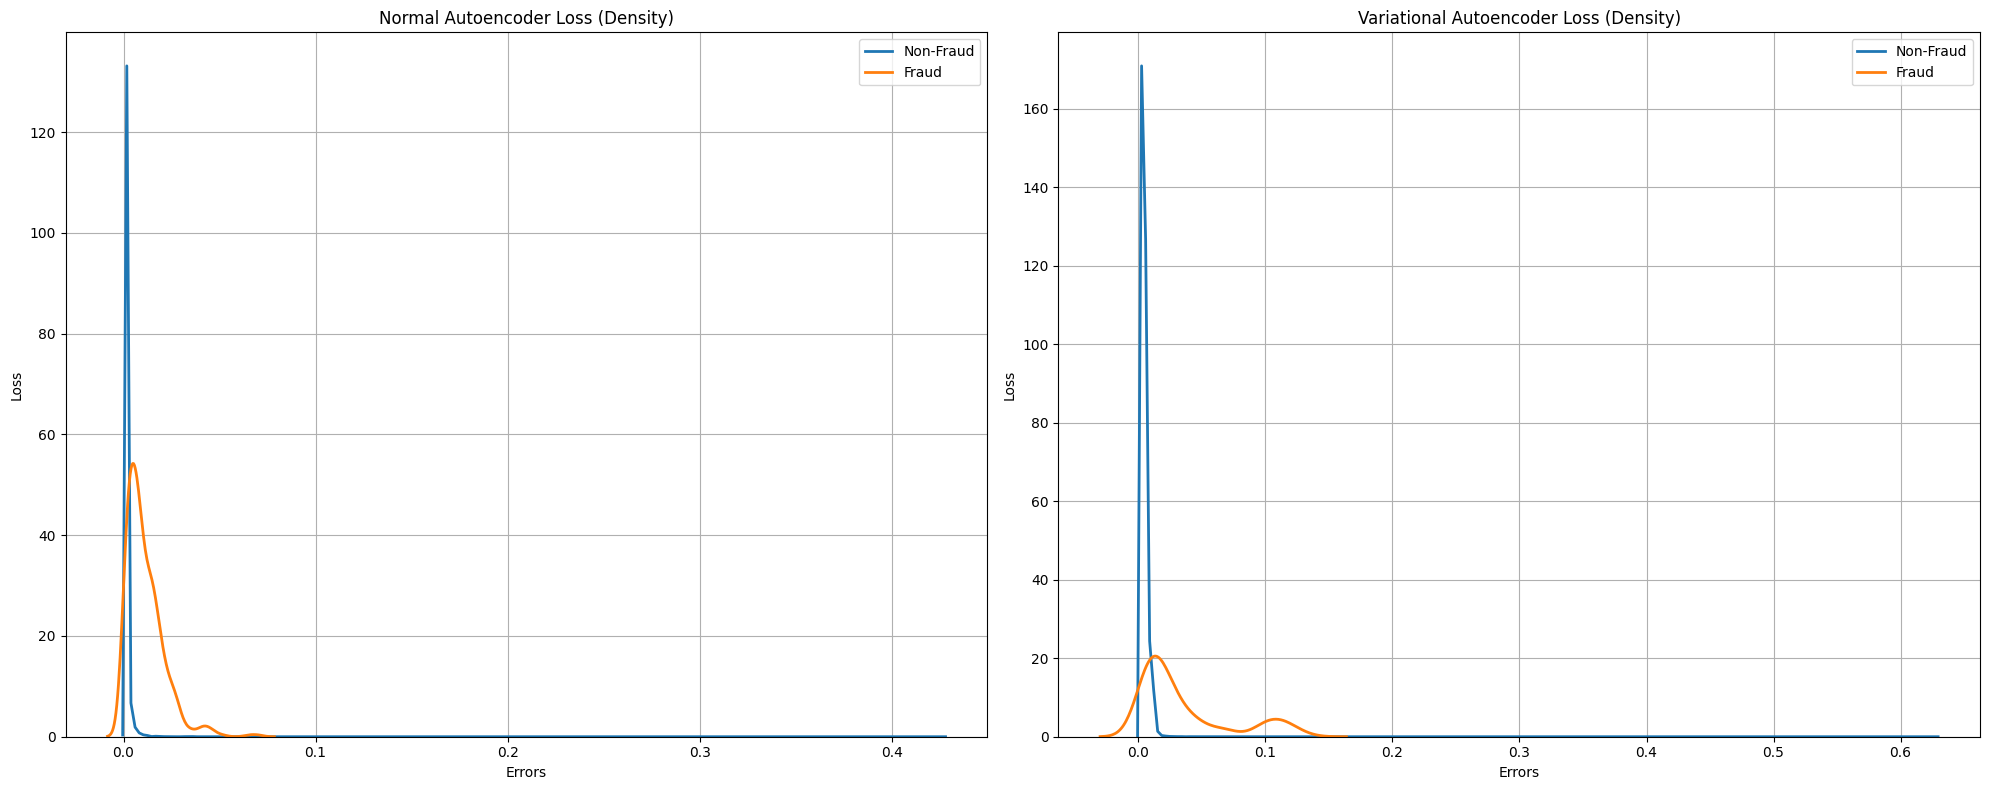

In [ ]:
plt.figure(figsize=(20, 8))

# Plot for Normal Autoencoder
plt.subplot(1, 2, 1)
sb.kdeplot(data=mse_n_fraud_per_sample_normal, linewidth=2, label='Non-Fraud')
sb.kdeplot(data=mse_fraud_per_sample_normal, linewidth=2, label='Fraud')
plt.legend(loc='upper right')
plt.title('Normal Autoencoder Loss (Density)')
plt.ylabel('Loss')
plt.xlabel('Errors')
plt.grid(True)

# Plot for Variational Autoencoder
plt.subplot(1, 2, 2)
sb.kdeplot(data=mse_n_fraud_per_sample_variational, linewidth=2, label='Non-Fraud')
sb.kdeplot(data=mse_fraud_per_sample_variational, linewidth=2, label='Fraud')
plt.legend(loc='upper right')
plt.title('Variational Autoencoder Loss (Density)')
plt.ylabel('Loss')
plt.xlabel('Errors')
plt.grid(True)

plt.tight_layout()
plt.show()


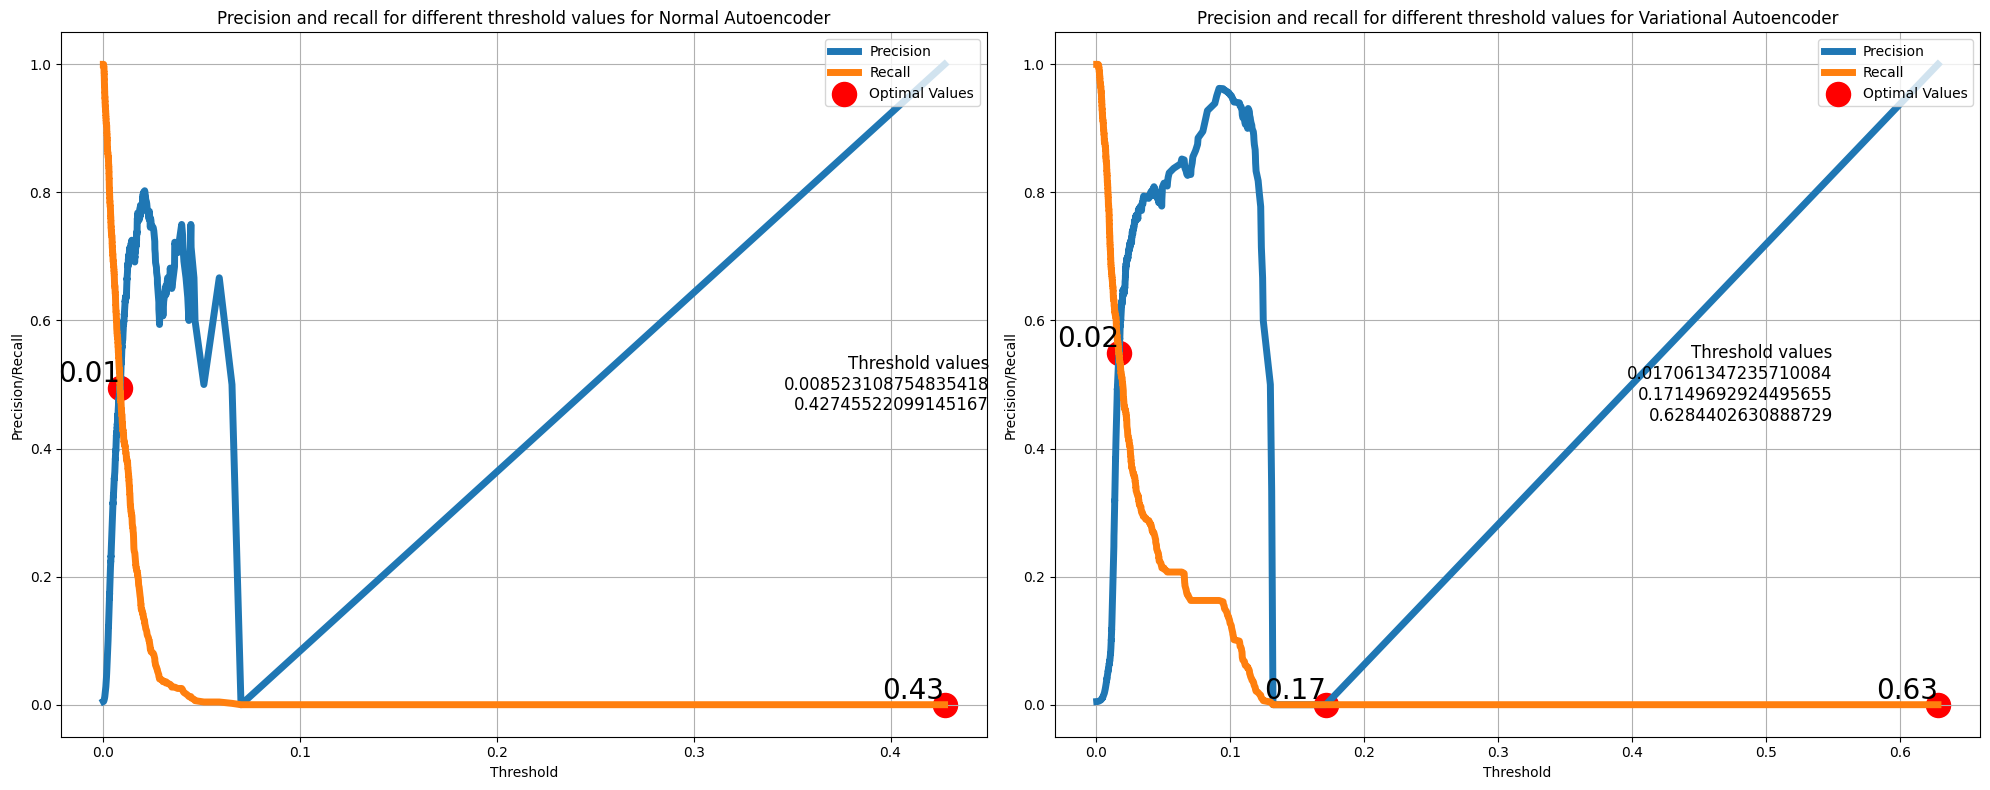

In [ ]:
plt.figure(figsize=(20, 8))

# Plot for Normal Autoencoder
precision_rt, recall_rt, threshold_rt = precision_recall_curve(y_test, mse_total_per_sample_normal)
pr_auc = auc(recall_rt, precision_rt,)

equal_indices = np.where(precision_rt[1:] == recall_rt[1:])[0]
equal_precision_recall_thresholds = threshold_rt[1:][equal_indices]

plt.subplot(1, 2, 1)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.scatter(equal_precision_recall_thresholds, precision_rt[1:][equal_indices], color='red', label='Optimal Values', s=300)

for i, txt in enumerate(equal_precision_recall_thresholds):
    plt.text(txt, precision_rt[1:][equal_indices][i], f"{txt:.2f}", ha='right', va='bottom', fontsize=20)


custom_text = 'Threshold values\n'+'\n'.join(equal_precision_recall_thresholds.astype(str))
plt.text(0.45, 0.5, custom_text, ha='right', va='center', fontsize=12)

plt.title('Precision and recall for different threshold values for Normal Autoencoder')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend(loc='upper right')
plt.grid(True)


# Plot for Variational Autoencoder
precision_rt, recall_rt, threshold_rt = precision_recall_curve(y_test, mse_total_per_sample_variational)
pr_auc = auc(recall_rt, precision_rt,)

equal_indices = np.where(precision_rt[1:] == recall_rt[1:])[0]
equal_precision_recall_thresholds = threshold_rt[1:][equal_indices]

plt.subplot(1, 2, 2)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.scatter(equal_precision_recall_thresholds, precision_rt[1:][equal_indices], color='red', label='Optimal Values', s=300)

for i, txt in enumerate(equal_precision_recall_thresholds):
    plt.text(txt, precision_rt[1:][equal_indices][i], f"{txt:.2f}", ha='right', va='bottom', fontsize=20)

custom_text = 'Threshold values\n'+'\n'.join(equal_precision_recall_thresholds.astype(str))
plt.text(0.55, 0.5, custom_text, ha='right', va='center', fontsize=12)

plt.title('Precision and recall for different threshold values for Variational Autoencoder')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

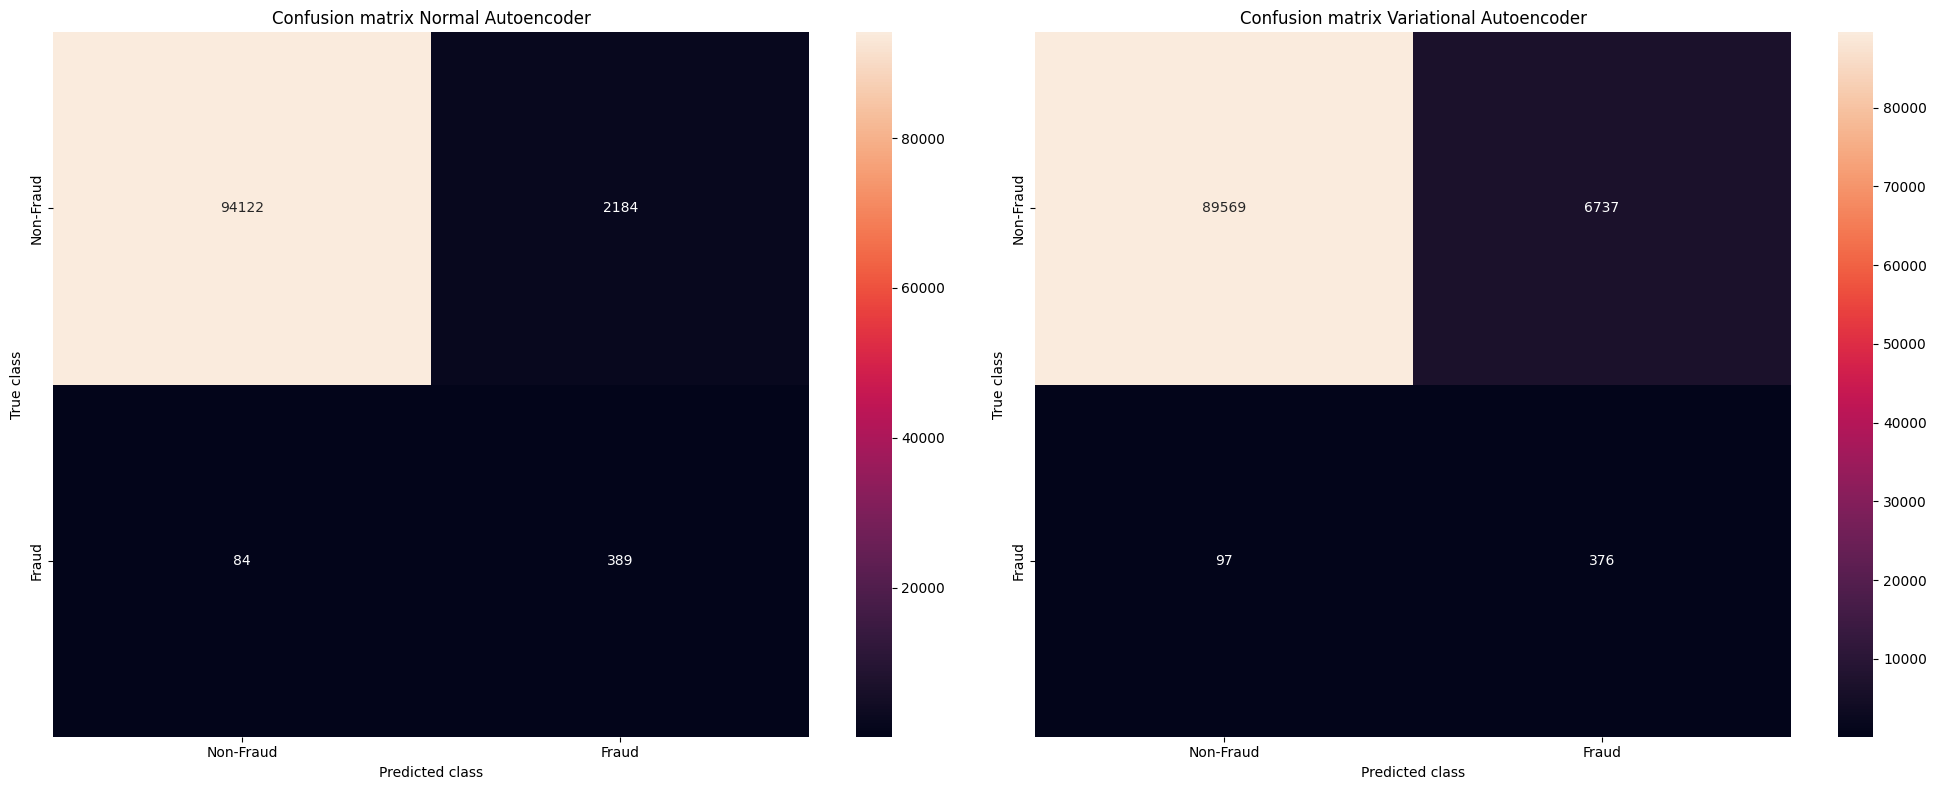

In [ ]:
plt.figure(figsize=(20, 8))
labels=['Non-Fraud','Fraud']
# From the above figures we select the thresholds for the fraud Vs no-fraud transactions

# Plot for Normal Autoencoder
threshold_fixed_normal=0.003
y_pred_normal = [1 if sample_class > threshold_fixed_normal else 0 for sample_class in mse_total_per_sample_normal]
conf_matrix = confusion_matrix(y_test, y_pred_normal)

plt.subplot(1, 2, 1)
sb.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title('Confusion matrix Normal Autoencoder')
plt.ylabel('True class')
plt.xlabel('Predicted class')

# Plot for Variational Autoencoder
threshold_fixed_variational=0.009
y_pred_variational = [1 if sample_class > threshold_fixed_variational else 0 for sample_class in mse_total_per_sample_variational]
conf_matrix = confusion_matrix(y_test, y_pred_variational)

plt.subplot(1, 2, 2)
sb.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title('Confusion matrix Variational Autoencoder')
plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.show()

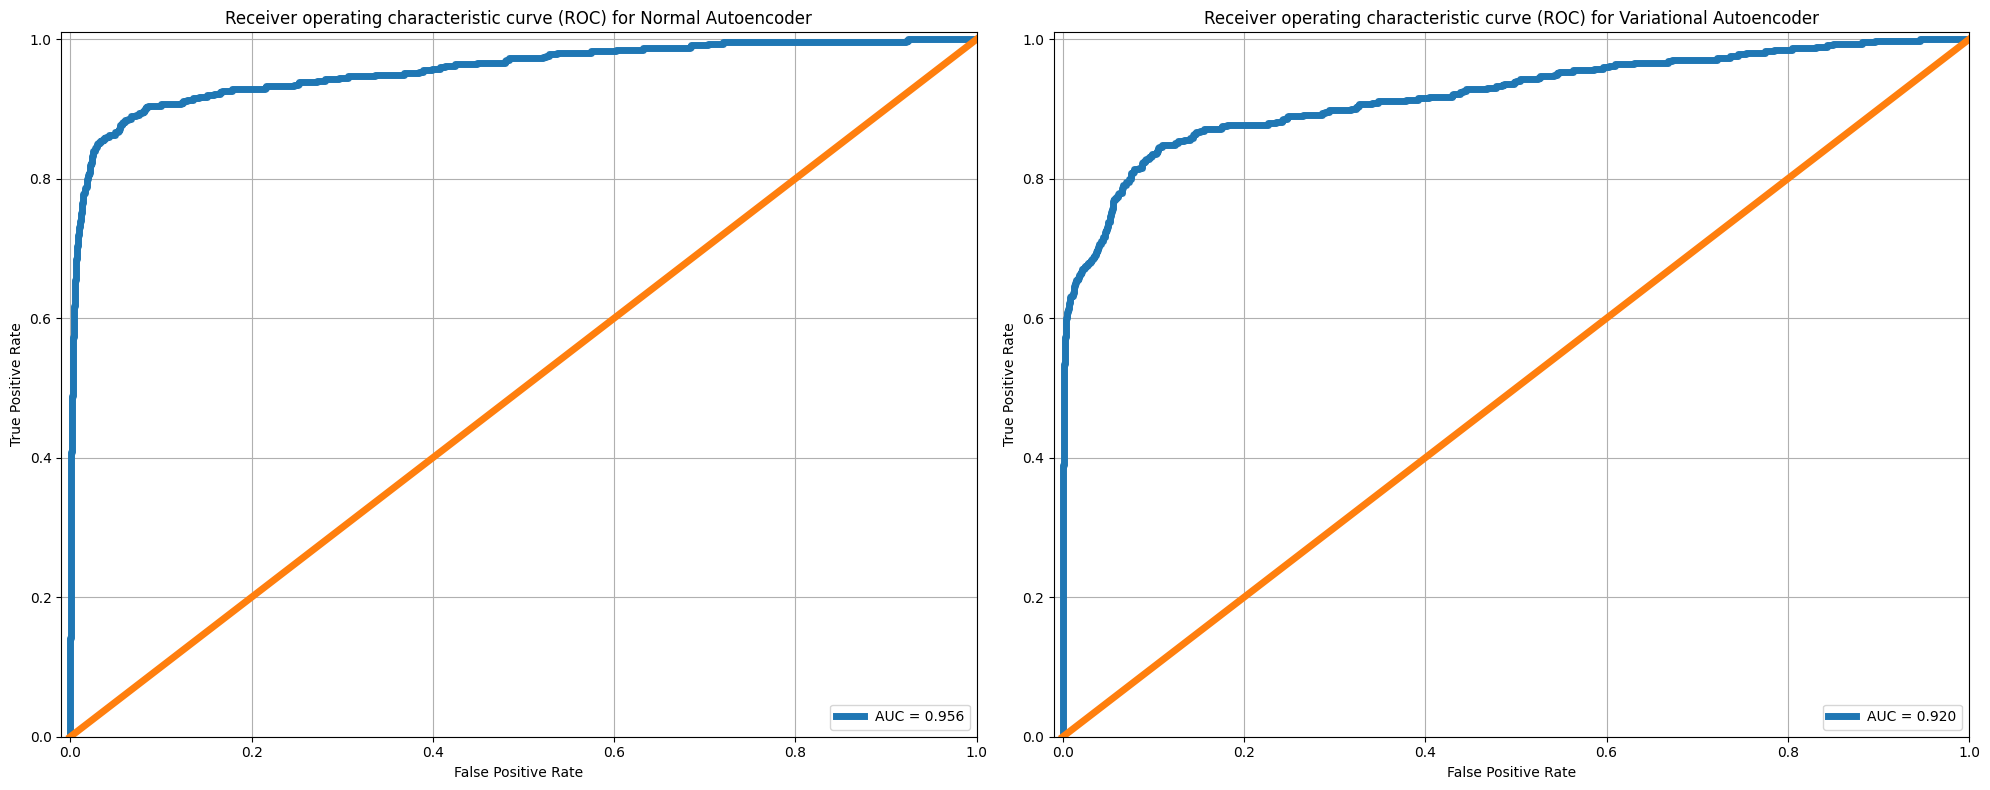

In [ ]:
plt.figure(figsize=(20, 8))

# Plot for Normal Autoencoder
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, mse_total_per_sample_normal)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.subplot(1, 2, 1)
plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC) for Normal Autoencoder')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)



# Plot for Variational Autoencoder
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, mse_total_per_sample_variational)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.subplot(1, 2, 2)
plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC) for Variational Autoencoder')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Accuracy for the Normal Autoencoder
print('Accuracy after defining the threshold (%.3f) for the Normal Autoencoder\n' % threshold_fixed_normal)
print(accuracy_score(y_test, y_pred_normal))

print('--'*25)

# Accuracy for the Variational Autoencoder
print('\nAccuracy after defining the threshold (%.3f) for the Variational Autoencoder\n' % threshold_fixed_variational)
print(accuracy_score(y_test, y_pred_variational))

Accuracy after defining the threshold (0.003) for the Normal Autoencoder

0.9765651639301914
--------------------------------------------------

Accuracy after defining the threshold (0.009) for the Variational Autoencoder

0.9293855071864764


In [ ]:
# Report for the Normal Autoencoder
print('Classification Report for the Normal Autoencoder\n')
print(classification_report(y_test, y_pred_normal))

print('--'*25)

# Report for the Variational Autoencoder
print('\n\nClassification Report for the Normal Autoencoder\n')
print(classification_report(y_test, y_pred_variational))

Classification Report for the Normal Autoencoder

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     96306
           1       0.15      0.82      0.26       473

    accuracy                           0.98     96779
   macro avg       0.58      0.90      0.62     96779
weighted avg       0.99      0.98      0.98     96779

--------------------------------------------------


Classification Report for the Normal Autoencoder

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     96306
           1       0.05      0.79      0.10       473

    accuracy                           0.93     96779
   macro avg       0.53      0.86      0.53     96779
weighted avg       0.99      0.93      0.96     96779



# Conclusion

1. The dataset includes 284,807 samples in which each one has unique values distributed in 31 different features. Out of them, 284 315, we believe, are no scams while the others 492 samples are fraudulent. This dataset comprises of no gaps that require filling and redundant transactions were removed to guarantee the reliability of data.


2. By analyzing the features, it can be seen that the relatively small group of them which have a normal (i.e., Gaussian) distribution. Contrarily, the distribution of fraud cases having a smaller size than the bin size does result in higher variance. The end of the distribution is the most controversial part when it comes to the variability of the data because one fraudulent action can massively affect the data. As a result, transaction volume alone does not work as a powerful tool for detecting fraud in such situations.


3. While we adopted the usual 66% non-fraud samples for training and 34% non-fraud samples & all fraud samples for testing, we followed the standard methodology of data splitting.

4. After finishing a successful training process by applying the proper architecture, we saw the best results of MSE (0.003 and 0.009) for the Normal and Variational Autoencoders, respectively. This has led to accuracy of 98% and 93% for both models.


5. In addition to them, the recall and F1-score metrics show the model’s moderate accuracy.


6. The breakpoints in the are of 77 & 99 false positives for Normal and Variational Autoencoders might serve as a good starting point. As such, we should look into increasing the benchmarks above in order to have a more precise outcome.